In [1]:
#importing the necessary libraries
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = yf.download("TCS.NS",start="2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1896.000000,1910.000000,1885.000000,1902.800049,1804.300293,1094883
2019-01-02,1905.000000,1934.449951,1900.000000,1923.300049,1823.739136,2100463
2019-01-03,1919.000000,1944.949951,1893.099976,1899.949951,1801.597778,2611668
2019-01-04,1900.000000,1901.199951,1841.000000,1876.849976,1779.693481,4280862
2019-01-07,1891.800049,1908.800049,1881.000000,1897.900024,1799.653809,1856423


In [4]:
data.drop("Adj Close",axis=1,inplace = True)

<AxesSubplot:>

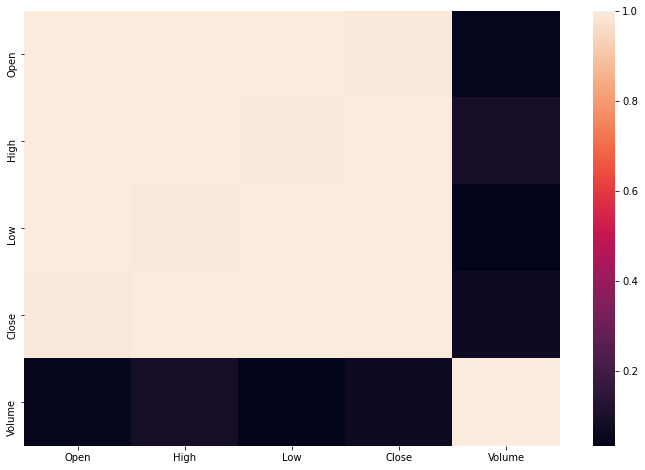

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

In [6]:
data.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.996528,0.996959,0.993879,0.047736
High,0.996528,1.000000,0.995903,0.997438,0.087163
Low,0.996959,0.995903,1.000000,0.996923,0.032968
Close,0.993879,0.997438,0.996923,1.000000,0.063611
Volume,0.047736,0.087163,0.032968,0.063611,1.000000


In [7]:
data.drop("Volume",axis=1,inplace=True)

In [8]:
data.head()

,Open,High,Low,Close
Date,,,,
2019-01-01,1896.000000,1910.000000,1885.000000,1902.800049
2019-01-02,1905.000000,1934.449951,1900.000000,1923.300049
2019-01-03,1919.000000,1944.949951,1893.099976,1899.949951
2019-01-04,1900.000000,1901.199951,1841.000000,1876.849976
2019-01-07,1891.800049,1908.800049,1881.000000,1897.900024


In [9]:
data.describe()

,Open,High,Low,Close
count,510.000000,510.000000,510.000000,510.000000
mean,2218.860095,2245.006071,2191.107556,2217.740395
std,313.525937,313.282688,313.514118,314.162804
min,1559.699951,1685.449951,1506.050049,1636.349976
25%,2043.500000,2063.787476,2015.625000,2040.662506
50%,2157.000000,2183.849976,2126.125000,2156.474976
75%,2260.000000,2277.637512,2236.987488,2254.487488
max,3308.949951,3339.800049,3278.649902,3308.800049


In [10]:
from sklearn.model_selection import train_test_split

In [59]:
xtrain,xtest,ytrain,ytest = train_test_split(data.drop("Close",axis=1),data['Close'],test_size=0.3,random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()

In [53]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [54]:
y_hat = lr.predict(xtest)

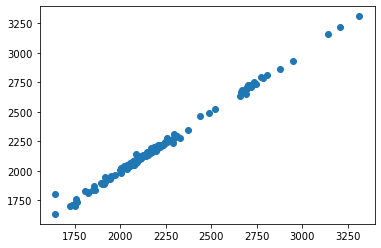

In [55]:
plt.scatter(y_hat,ytest)

<AxesSubplot:xlabel='Close'>

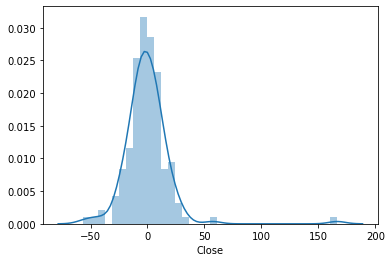

In [56]:
sns.distplot(ytest-y_hat)

In [57]:
from sklearn.metrics import r2_score

In [58]:
r2_score(ytest,y_hat)*100

99.53263389998767

In [20]:
import pickle

In [21]:
model = pickle.dump(lr,open("model.pkl","wb"))

In [22]:
model_2 = pickle.load(open("model.pkl","rb"))